## _Columns Description:_
-  __bookID__ _Contains the unique ID for each book/series_<br>
-  __title__  _contains the titles of the books_
-  __authors__ _contains the author of the particular book_
-   __average_rating__ _the average rating of the books, as decided by the users_
- __ISBN__ _ISBN(10) number, tells the information about a book - such as edition and publisher_
-	__ISBN 13__ _The new format for ISBN, implemented in 2007. 13 digits_
-	__language_code__ _Tells the language for the books_
-	__Num_pages__ _Contains the number of pages for the book_
-	__Ratings_count__ _Contains the number of ratings given for the book_
-	__text_reviews_count__ _Has the count of reviews left by users_


## _Loading libraries with installation_ 

In [29]:
import pandas as pd
from textwrap import wrap
from matplotlib import pyplot as plt
from pylab import *
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Reading CSV file
df=pd.read_csv('books.csv',error_bad_lines=False)
df.head()

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [31]:
#Finding Number of rows and columns
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 13714 rows and 10 columns


In [32]:
df.shape

(13714, 10)

In [33]:
#Finding the null columns in the data Set
df.isnull().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
# num_pages           0
ratings_count         0
text_reviews_count    0
dtype: int64

In [34]:
# As we can see there is no null value in the cells
df.notnull().sum()

bookID                13714
title                 13714
authors               13714
average_rating        13714
isbn                  13714
isbn13                13714
language_code         13714
# num_pages           13714
ratings_count         13714
text_reviews_count    13714
dtype: int64

In [35]:
df2=df.sort_values(by=['average_rating'],ascending=False)
series=df2['average_rating']
series_lang=df2['language_code']
ser_lang=series_lang[series_lang=='eng']
series3=series[series_lang=='eng']
#print(ser_lang)
title=df['title']
title3=title[series_lang=='eng']

y=list(series3)
x=list(title3)




## _Exploratory Data Analysis_

#### _10 highest rating books in English_

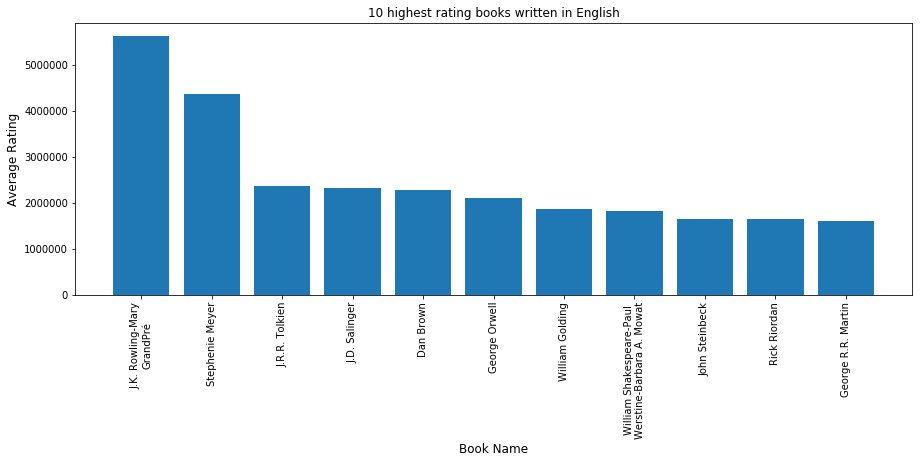

In [60]:

labels = [ '\n'.join(wrap(l, 25)) for l in x[:16] ]
fsize=16
fig = plt.figure(figsize=(15,5))
plt.bar(labels,y[:16],linewidth=10)
#print(x2[:6])
plt.xticks(rotation=90,fontsize=10)
plt.ylabel('Average Rating',fontsize=12)
plt.xlabel('Book Name',fontsize=12)
plt.title("10 highest rating books written in English")
fig.savefig('test2png123.png', dpi=200)


### _Is there any corelation between rating and number of pages_ ?<br>
    The answere is no. The relation between the two on a scale of -1 to 1 is .16, which seems like a neutral relationship. My finding says that people give more value to the content of the book rather than number of pages in the book. 

[[1.        0.1673885]
 [0.1673885 1.       ]]


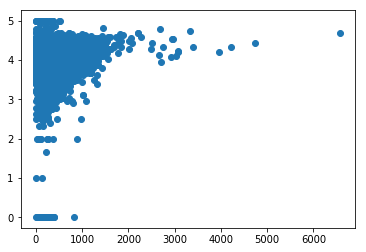

In [37]:
x1=df2['average_rating']
numpages=df2['# num_pages']
rating=np.array(x1)
pages=np.array(numpages)
#y2.shape
corr=np.corrcoef(rating,pages)
print(corr)
plt.scatter(pages,rating)

### _Does high rating books have more number of Text_Reviews ?<br>
    The answer is no. The co-relation between the two vaiable on a scale of -1 to 1 is .03. This may be because some books might have good rating but only a few people have read that book or there may be afake rating about the book. But in most cases people only write reviews after reading the book.

[[1.         0.03669533]
 [0.03669533 1.        ]]


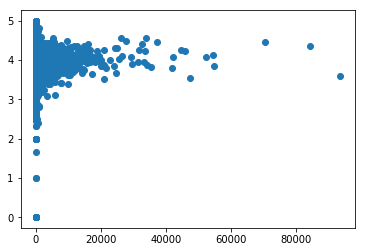

In [38]:
x1=df2['average_rating']
text_review=df2['text_reviews_count']
rating=np.array(x1)
text_reviews=np.array(text_review)
#y2.shape
corr=np.corrcoef(rating,text_reviews)
print(corr)
plt.scatter(text_reviews,rating)

### _What are the 10 books which have the highest rating count?_

In [39]:
df3=df.sort_values(by=['ratings_count'],ascending=False)
df4=df3.loc[df3['language_code']=='eng']
title=df4['title']
rating_count=df4['ratings_count']
x=list(title)
y=list(rating_count)

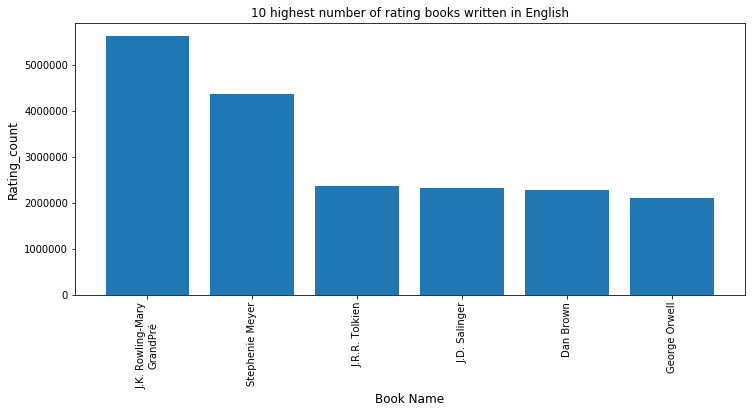

In [53]:
import matplotlib as mpl
from textwrap import wrap
from matplotlib import pyplot as plt
from pylab import *
labels = [ '\n'.join(wrap(l, 25)) for l in x[:11] ]
fsize=16
fig = plt.figure(figsize=(12,5))
plt.bar(labels,y[:11],linewidth=10)

plt.xticks(rotation=90,fontsize=10)
plt.ylabel('Rating_count',fontsize=12)
plt.xlabel('Book Name',fontsize=12)
plt.title("10 highest number of rating books written in English")
fig.savefig('test2png123.png', dpi=100)


### _10 authors with most number of books_

In [41]:
df['authors'].value_counts().head(10) # Top 10 authors with most number of books

Agatha Christie                69
Stephen King                   66
Orson Scott Card               48
Rumiko Takahashi               46
P.G. Wodehouse                 42
Terry Brooks                   40
Piers Anthony                  34
Margaret Weis-Tracy Hickman    33
Dan Simmons                    32
Sandra Brown                   31
Name: authors, dtype: int64

### _Authors with higest number of Book Ratings_ 

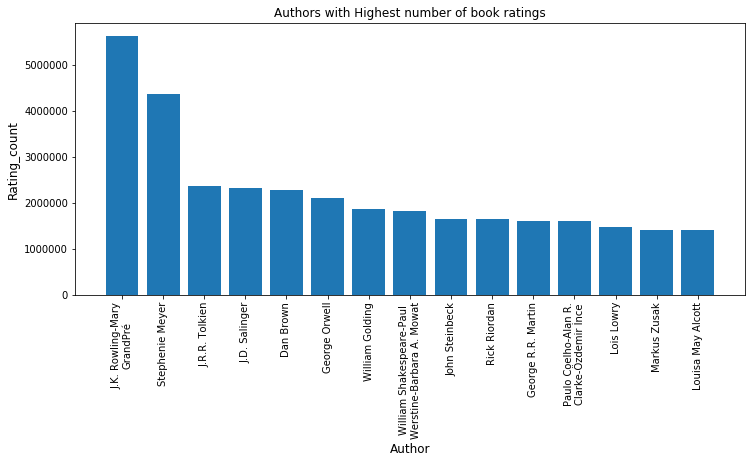

In [58]:
df6=df.loc[(df['language_code']=='eng')].sort_values('ratings_count',ascending=False)
author=df6['authors']
ratingcount=df6['ratings_count']
x=list(author)
y=list(ratingcount)
labels = [ '\n'.join(wrap(l, 25)) for l in x[:21] ]
fsize=16
fig = plt.figure(figsize=(12,5))
plt.bar(labels,y[:21],linewidth=10)

plt.xticks(rotation=90,fontsize=10)
plt.ylabel('Rating_count',fontsize=12)
plt.xlabel('Author',fontsize=12)
plt.title("Authors with Highest number of book ratings")
fig.savefig('test2png123.png', dpi=200)


In [62]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
